In [1]:
import datetime

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
np.random.seed(41 * 41)

In [3]:
%%time
df = pd.read_csv('../data/parsedv4.csv')

CPU times: user 9.79 s, sys: 1.72 s, total: 11.5 s
Wall time: 11.6 s


In [4]:
MAX_FEATURES = 6000
tf_vectorizer = CountVectorizer(min_df=5, max_df=0.5,
                                max_features=MAX_FEATURES,
                                lowercase=True,
                                token_pattern='[a-z]{3}[a-z]*',
                                stop_words='english')

In [5]:
%%time
dtm = tf_vectorizer.fit_transform(df['text'])
dtm.shape

CPU times: user 43.1 s, sys: 469 ms, total: 43.6 s
Wall time: 43.6 s


In [6]:
len(tf_vectorizer.vocabulary_)

6000

In [7]:
NUM_TOPICS = 30
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS,
                                      max_iter=10,
                                      learning_method='online',
                                      verbose = 1,
                                      batch_size=1024,
                                      n_jobs = 7)

In [8]:
%%time
lda_Z = lda_model.fit_transform(dtm)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
CPU times: user 18.1 s, sys: 7.55 s, total: 25.6 s
Wall time: 2min 19s


In [9]:
%%time
doc_topic_dist = lda_model.transform(dtm)

CPU times: user 417 ms, sys: 293 ms, total: 710 ms
Wall time: 11.6 s


In [10]:
doc_topic_dist[1]

array([  3.66300366e-04,   3.66300366e-04,   3.66300366e-04,
         8.80108910e-02,   3.66300366e-04,   3.01254937e-02,
         3.66300366e-04,   3.66300366e-04,   3.66300366e-04,
         3.66300366e-04,   3.66300366e-04,   3.66300366e-04,
         3.66300366e-04,   3.66300366e-04,   3.66300366e-04,
         3.66300366e-04,   3.66300366e-04,   3.66300366e-04,
         3.66300366e-04,   3.66300366e-04,   3.66300366e-04,
         3.66300366e-04,   3.66300366e-04,   8.71973505e-01,
         3.66300366e-04,   3.66300366e-04,   3.66300366e-04,
         3.66300366e-04,   3.66300366e-04,   3.66300366e-04])

In [11]:
pyLDAvis.sklearn.prepare(lda_model, dtm, tf_vectorizer)

/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
4      6.784056        1       1 -0.176987  0.028178
23     5.305333        1       2  0.099644 -0.125009
27     5.187990        1       3  0.162217 -0.041776
18     4.648539        1       4  0.016953 -0.033628
26     4.591115        1       5  0.155201  0.035285
8      4.486816        1       6  0.129764 -0.157513
16     4.377960        1       7 -0.134645 -0.130241
29     4.091063        1       8 -0.195539  0.012669
20     3.916337        1       9  0.015433  0.110944
2      3.794424        1      10 -0.124166 -0.105497
28     3.744162        1      11 -0.016800 -0.012651
12     3.737168        1      12 -0.098694 -0.137674
0      3.564319        1      13 -0.060037  0.117168
5      3.549647        1      14  0.188475  0.127090
25     3.456567        1      15  0.116803  0.041288
24     3.375812        1      16  0.041374  0.157378
10     3.353397        1      17 -0.123564  0.061471
21     3.114115        1      18  0.152260 -0.039321
17     2.783333        1      19 -0.082677 -0.021318
14     2.716962        1      20 -0.157595 -0.054179
9      2.701545        1      21  0.120758  0.051474
6      2.603138        1      22  0.131883 -0.029742
1      2.238725        1      23  0.081873 -0.031580
15     2.085556        1      24  0.131088 -0.010258
13     1.998359        1      25  0.089613 -0.066975
19     1.975420        1      26 -0.149805  0.030923
22     1.698811        1      27 -0.043234 -0.005647
7      1.545726        1      28 -0.156931  0.030626
3      1.473169        1      29 -0.082189  0.116121
11     1.100436        1      30 -0.030476  0.082395, topic_info=     Category           Freq            Term          Total  loglift  logprob
term                                                                         
1049  Default  133132.000000         company  133132.000000  30.0000  30.0000
5438  Default   71467.000000             tax   71467.000000  29.0000  29.0000
3173  Default   70677.000000            land   70677.000000  28.0000  28.0000
1023  Default   62983.000000      commission   62983.000000  27.0000  27.0000
923   Default   62012.000000            city   62012.000000  26.0000  26.0000
645   Default   59517.000000           board   59517.000000  25.0000  25.0000
3940  Default   39172.000000          patent   39172.000000  24.0000  24.0000
4427  Default   51497.000000        railroad   51497.000000  23.0000  23.0000
3125  Default   64035.000000            jury   64035.000000  22.0000  22.0000
3176  Default   47404.000000           lands   47404.000000  21.0000  21.0000
2268  Default  114211.000000         federal  114211.000000  20.0000  20.0000
4021  Default   76322.000000      petitioner   76322.000000  19.0000  19.0000
558   Default   49162.000000            bank   49162.000000  18.0000  18.0000
1021  Default   45209.000000        commerce   45209.000000  17.0000  17.0000
1366  Default   49277.000000          county   49277.000000  16.0000  16.0000
2963  Default   22839.000000       insurance   22839.000000  15.0000  15.0000
1225  Default   60126.000000    constitution   60126.000000  14.0000  14.0000
1283  Default   71140.000000        contract   71140.000000  13.0000  13.0000
4089  Default   34600.000000          policy   34600.000000  12.0000  12.0000
2522  Default   98314.000000      government   98314.000000  11.0000  11.0000
5611  Default   70574.000000           trial   70574.000000  10.0000  10.0000
3007  Default   30104.000000      interstate   30104.000000   9.0000   9.0000
1342  Default   45778.000000     corporation   45778.000000   8.0000   8.0000
3161  Default   29975.000000           labor   29975.000000   7.0000   7.0000
1442  Default   30315.000000         damages   30315.000000   6.0000   6.0000
5541  Default   63016.000000           title   63016.000000   5.0000   5.0000
5688  Default   36937.000000           union   36937.000000   4.0000   4.0000

In [49]:
doc_topic_sums = doc_topic_dist.sum(axis=1)
doc_topic_dist = doc_topic_dist / doc_topic_sums[:, np.newaxis]

In [13]:
year_dist = {}
year_cnt = {}
for i in range (len(df)):
    a = df["date"][i]
    yeark = datetime.datetime.strptime(a, "%Y-%m-%d").year
    if yeark in year_dist:
        year_dist[yeark] += doc_topic_dist[i]
        year_cnt[yeark] += 1
    else:
        year_dist[yeark] = doc_topic_dist[i]
        year_cnt[yeark] = 1
        
for key in year_dist:
    year_dist[key] /= year_cnt[key]

In [14]:
plt_years = list(filter(lambda year: 1780 <= year and year <= 2005, sorted(year_dist.keys())))

In [15]:
dist = np.zeros((len(plt_years), NUM_TOPICS))
for i, year in enumerate(plt_years):
    dist[i] = year_dist[year]

CPU times: user 8.04 s, sys: 40.4 ms, total: 8.08 s
Wall time: 8.09 s


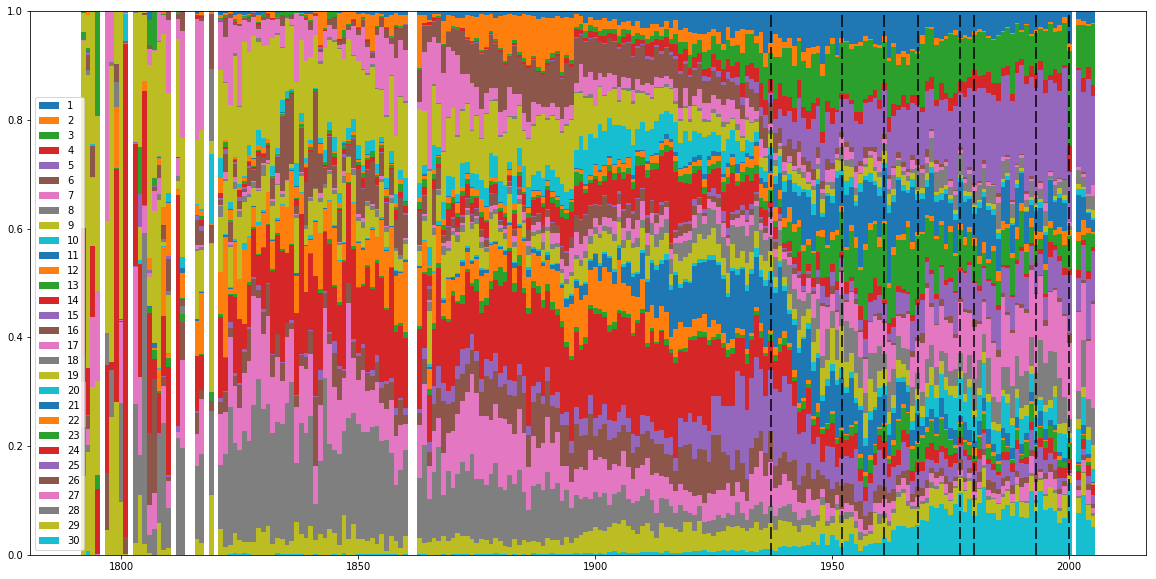

In [80]:
%%time
plt.figure(figsize=(20,10))
bot = np.ones(len(plt_years)) - dist[:, 0]
plt.bar(plt_years, dist[:, 0], width=1, bottom = bot)
for i in range(1, NUM_TOPICS):
    bot -= dist[:, i]
    plt.bar(plt_years, dist[:, i], bottom=bot, width=1)
plt.legend(list(range(1, NUM_TOPICS + 1)))
for x in [1937, 1952, 1961, 1968, 1977, 1980, 1993, 2000]:
    plt.axvline(x=x, dashes=[6, 2], color="black")

In [65]:
def plot_person(last):
    warren_dist = {}
    warren_cnt = {}
    for i in range (len(df)):
        if df['last'][i] == last:
            a = df["date"][i]
            yeark = datetime.datetime.strptime(a, "%Y-%m-%d").year
            if yeark in warren_dist:
                warren_dist[yeark] += doc_topic_dist[i]
                warren_cnt[yeark] += 1
            else:
                warren_dist[yeark] = doc_topic_dist[i]
                warren_cnt[yeark] = 1
    for key in warren_dist:
        warren_dist[key] /= warren_cnt[key]
    
    med = int(np.median(list(warren_dist.keys())))
    warren_years = list(filter(lambda year: med - 25 <= year and year <= med + 25, sorted(warren_dist.keys())))
    
    warren_np = np.zeros((len(warren_years), NUM_TOPICS))
    for i, year in enumerate(warren_years):
        warren_np[i] = warren_dist[year]
        
    plt.figure(figsize=(20,10))
    bot = np.ones(len(warren_years)) - warren_np[:, 0]
    plt.bar(warren_years, warren_np[:, 0], width=1, bottom=bot)
    for i in range(1, NUM_TOPICS):
        bot -= warren_np[:, i]
        plt.bar(warren_years, warren_np[:, i], bottom=bot, width=1)
    plt.legend(list(range(1, NUM_TOPICS + 1)))

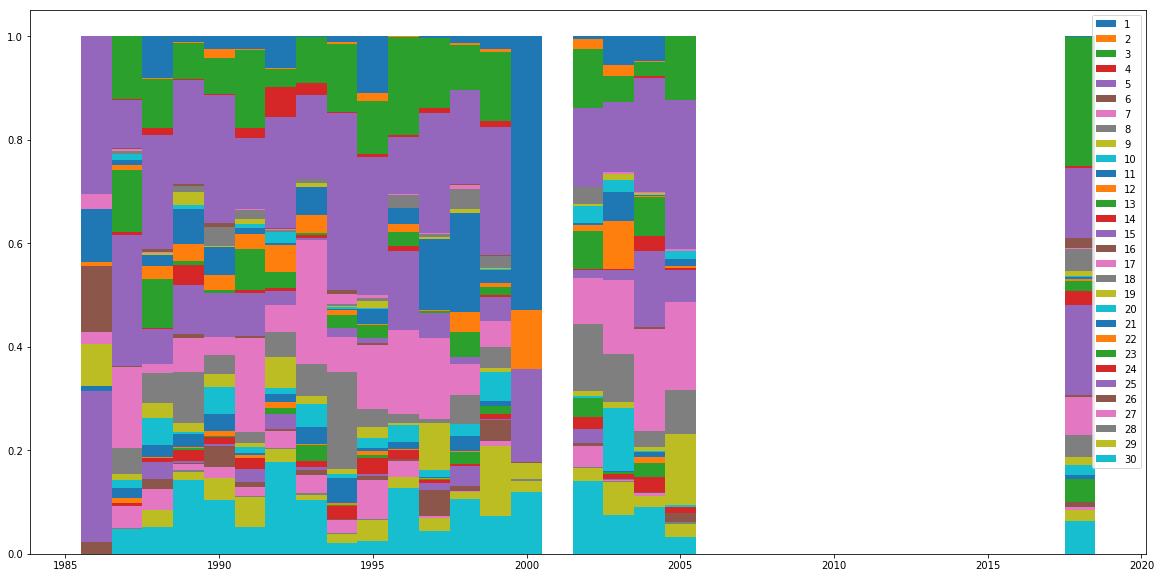

In [67]:
plot_person("Scalia")

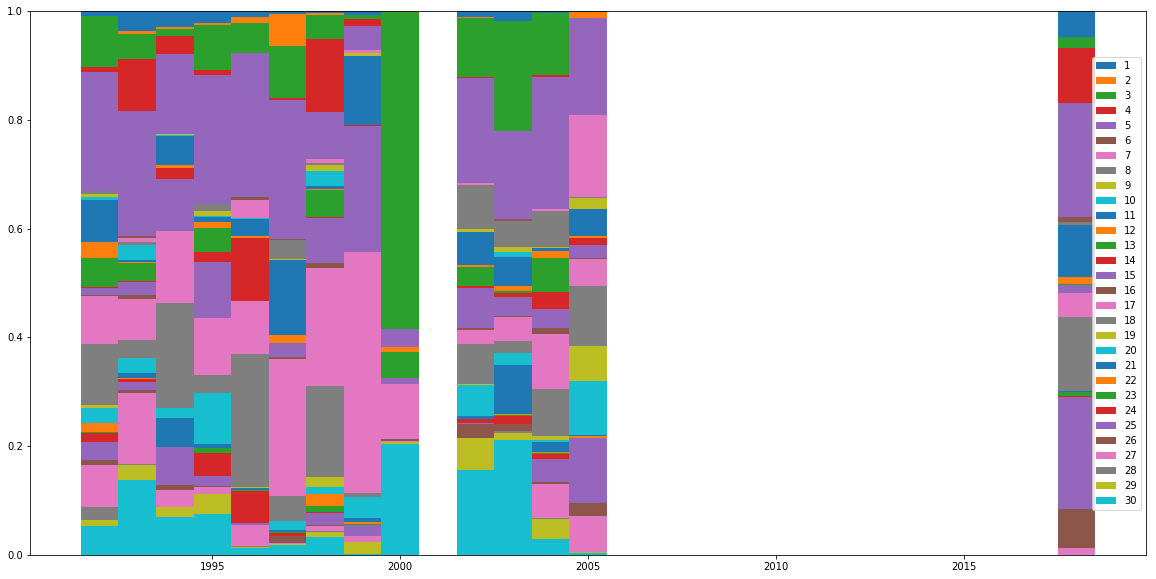

In [70]:
plot_person("Thomas")